<a href="https://colab.research.google.com/github/santiagoql/HEU/blob/main/Heu2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto 2: Metaheur√≠sticas Aleatorizadas para Balanceo de Sistemas PTL**


## **Descripci√≥n de los M√©todos Utilizados**

En este proyecto se implementan y comparan dos enfoques para la asignaci√≥n de pedidos en un sistema **Pick-to-Light (PTL)**, con el objetivo de **minimizar la carga m√°xima** en las zonas de trabajo:

- Un **m√©todo constructivo (heur√≠stica voraz)** que asigna los pedidos de manera secuencial.
- Un **m√©todo aleatorizado basado en Recocido Simulado (Simulated Annealing)**, que explora m√∫ltiples soluciones para mejorar la asignaci√≥n inicial.

Se comparan ambos m√©todos en t√©rminos de **calidad de la soluci√≥n** y **tiempo de c√≥mputo**, utilizando un conjunto de instancias de prueba.


## **1. M√©todo Constructivo (Heur√≠stica Greedy)**

Este m√©todo sigue una estrategia determin√≠stica para asignar los pedidos a las salidas del sistema PTL, buscando equilibrar la carga entre zonas de manera directa.

### **Descripci√≥n**
- Se recorren los pedidos en orden y se asignan secuencialmente a las salidas disponibles.
- Se intenta distribuir la carga de manera equitativa entre las zonas.
- No se realizan ajustes posteriores ni exploraci√≥n de soluciones alternativas.

### **Ventajas y Desventajas**
‚úÖ **Ventajas:** M√©todo r√°pido y computacionalmente eficiente.  
‚ùå **Desventajas:** Puede generar soluciones sub√≥ptimas debido a su naturaleza determinista.


## **2. M√©todo Aleatorizado (Recocido Simulado - Simulated Annealing, SA)**

El **Recocido Simulado (Simulated Annealing, SA)** es una t√©cnica inspirada en el proceso de enfriamiento de metales, que permite la exploraci√≥n de soluciones mediante cambios aleatorios controlados.

### **Descripci√≥n Matem√°tica**
Dado un conjunto de pedidos \( P \), salidas \( S \) y zonas \( Z \), el objetivo es minimizar la carga m√°xima en cualquier zona:

\[
\min \max_{z \in Z} C_z
\]

donde \( C_z \) representa la carga total en la zona \( z \), calculada como:

\[
C_z = \sum_{p \in P_z} \frac{T_p + 2 (d_{pz} / v)}{\text{prod}(T_z)}
\]

- \( T_p \) es el tiempo de preparaci√≥n del pedido \( p \).
- \( d_{pz} \) es la distancia a la zona \( z \).
- \( v \) es la velocidad de desplazamiento.
- \( \text{prod}(T_z) \) es la productividad del trabajador asignado a \( z \).


## **Algoritmo en Pseudoc√≥digo**

```plaintext
1. Inicializar temperatura T = T_INICIAL
2. Generar una soluci√≥n inicial aleatoria
3. Evaluar la carga m√°xima de la soluci√≥n inicial
4. Mientras T > T_FINAL:
    5. Repetir ITERACIONES_POR_TEMPERATURA veces:
        6. Generar una soluci√≥n vecina modificando la asignaci√≥n de un pedido
        7. Evaluar la carga m√°xima de la nueva soluci√≥n
        8. Si la nueva soluci√≥n es mejor, aceptarla
        9. Si es peor, aceptarla con probabilidad exp(-delta / T)
    10. Reducir la temperatura: T = T * FACTOR_ENFRIAMIENTO
11. Retornar la mejor soluci√≥n encontrada



---

### **Representaci√≥n de Soluciones y Perturbaci√≥n**


solucion = {
    "Pedido_001": ("S034", "Z1"),
    "Pedido_002": ("S056", "Z2"),
    ...
}



---

### **Comparaci√≥n de M√©todos**


## **Comparaci√≥n de M√©todos**

| M√©todo               | Estrategia     | Exploraci√≥n | Calidad de soluci√≥n | Tiempo de c√≥mputo |
|----------------------|---------------|-------------|---------------------|------------------|
| **Greedy (Constructivo)** | Determinista  | Baja        | Sub√≥ptima           | R√°pido |
| **Recocido Simulado (SA)** | Aleatorizada | Alta        | Mejor equilibrio    | Mayor |

El **Recocido Simulado** es capaz de encontrar soluciones m√°s balanceadas al permitir cambios aleatorios y exploraci√≥n del espacio de b√∫squeda, aunque a costa de un mayor tiempo de c√≥mputo en comparaci√≥n con la heur√≠stica constructiva.

## 80 Homogenea

Aleatorizado

In [ ]:
import pandas as pd
import os
import numpy as np
import time

# Par√°metros del Recocido Simulado
T_INICIAL = 1000  # Temperatura inicial
T_FINAL = 1  # Temperatura final
FACTOR_ENFRIAMIENTO = 0.95  # Factor de enfriamiento
ITERACIONES_POR_TEMPERATURA = 80

def evaluar_solucion(asignaciones, tiempos_pedidos, tiempos_posiciones, productividad, trabajadores_zonas, v):
    carga = {zona: 0.0 for zona in trabajadores_zonas.keys()}
    for pedido, (salida, zona) in asignaciones.items():
        tiempo_viaje = 2 * (tiempos_posiciones[zona][salida] / v)
        carga[zona] += (sum(tiempos_pedidos[pedido]) + tiempo_viaje) / productividad[trabajadores_zonas[zona]]
    return carga

def generar_vecino(asignaciones, posiciones_disponibles):
    nuevo_asignaciones = asignaciones.copy()
    pedido_cambiar = np.random.choice(list(nuevo_asignaciones.keys()))
    zona_actual = nuevo_asignaciones[pedido_cambiar][1]
    zonas_posibles = list(posiciones_disponibles.keys())
    if zona_actual in zonas_posibles:
        zonas_posibles.remove(zona_actual)
    if not zonas_posibles:
        return nuevo_asignaciones  # No hay zonas disponibles para cambiar
    nueva_zona = np.random.choice(zonas_posibles)
    nueva_salida = np.random.choice(posiciones_disponibles[nueva_zona])
    nuevo_asignaciones[pedido_cambiar] = (nueva_salida, nueva_zona)
    return nuevo_asignaciones

def recocido_simulado():
    start_time = time.time()
    file_path = "/content/Data_80_Salidas_composici√≥n_zonas_homog√©neas.xlsx"
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"No se encontr√≥ el archivo: {file_path}")

    df_tiempo_sku = pd.read_excel(file_path, sheet_name="Tiempo_SKU", index_col=0)
    df_zonas = pd.read_excel(file_path, sheet_name="Zonas")
    df_salidas_zonas = pd.read_excel(file_path, sheet_name="Salidas_pertenece_zona", index_col=0)

    tiempos_pedidos = {pedido: row.tolist() for pedido, row in df_tiempo_sku.iterrows()}
    v = 61.66  # Velocidad (m/s)
    productividad = {"T0": 0.77, "T1": 1.0, "T2": 0.7, "T3": 1.6}

    zonas_disponibles = df_zonas["Zonas"].tolist()
    posiciones = {zona: df_salidas_zonas.columns[df_salidas_zonas.loc[zona] == 1].tolist() for zona in zonas_disponibles}
    trabajadores_zonas = {zona: "T1" for zona in posiciones.keys()}  # Asignamos trabajador gen√©rico
    tiempos_posiciones = {zona: {pos: np.random.uniform(0.3, 7.0) for pos in posiciones[zona]} for zona in posiciones}

    # Inicializar asignaciones
    asignaciones = {}
    for pedido in tiempos_pedidos.keys():
        zona = np.random.choice(zonas_disponibles)
        salida = np.random.choice(posiciones[zona])
        asignaciones[pedido] = (salida, zona)

    # Recocido Simulado
    T = T_INICIAL
    mejor_solucion = asignaciones.copy()
    mejor_carga = evaluar_solucion(mejor_solucion, tiempos_pedidos, tiempos_posiciones, productividad, trabajadores_zonas, v)
    while T > T_FINAL:
        for _ in range(ITERACIONES_POR_TEMPERATURA):
            nueva_solucion = generar_vecino(mejor_solucion, posiciones)
            nueva_carga = evaluar_solucion(nueva_solucion, tiempos_pedidos, tiempos_posiciones, productividad, trabajadores_zonas, v)
            delta = max(nueva_carga.values()) - max(mejor_carga.values())
            if delta < 0 or np.random.rand() < np.exp(-delta / T):
                mejor_solucion = nueva_solucion.copy()
                mejor_carga = nueva_carga.copy()
        T *= FACTOR_ENFRIAMIENTO

    # Guardar resultados en las tres hojas
    df_sol = pd.DataFrame([{ "Pedido": pedido, "Salida": salida, "Zona": zona} for pedido, (salida, zona) in mejor_solucion.items()])
    df_res = pd.DataFrame([{ "Instancia": "Data_80_Salidas_composici√≥n_zonas_homog√©neas", "Zona": max(mejor_carga, key=mejor_carga.get), "Maximo": max(mejor_carga.values())}])
    df_met = pd.DataFrame([[zona, mejor_carga[zona]] for zona in mejor_carga.keys()], columns=["Zona", "Carga final"])
    output_file = "SolucionPTL_Aleatorizado_HO80.xlsx"
    with pd.ExcelWriter(output_file, engine="openpyxl") as writer:
        df_res.to_excel(writer, sheet_name="Resumen", index=False)
        df_sol.to_excel(writer, sheet_name="Solucion", index=False)
        df_met.to_excel(writer, sheet_name="Metricas", index=False)

    end_time = time.time()
    print(f"Recocido Simulado: Archivo generado: {output_file}")
    print(f"Tiempo de ejecuci√≥n: {end_time - start_time:.2f} segundos")
    print("Resumen:")
    print(df_res)
    print("Solucion:")
    print(df_sol)
    print("Metricas:")
    print(df_met)

if __name__ == "__main__":
    recocido_simulado()


Recocido Simulado: Archivo generado: SolucionPTL_Aleatorizado_HO80.xlsx
Tiempo de ejecuci√≥n: 6.41 segundos
Resumen:
                                      Instancia Zona      Maximo
0  Data_80_Salidas_composici√≥n_zonas_homog√©neas   Z4  378.869058
Solucion:
       Pedido Salida Zona
0    Pedido_1   S019   Z1
1    Pedido_2   S056   Z3
2    Pedido_3   S078   Z4
3    Pedido_4   S058   Z3
4    Pedido_5   S019   Z1
..        ...    ...  ...
75  Pedido_76   S038   Z2
76  Pedido_77   S005   Z1
77  Pedido_78   S006   Z1
78  Pedido_79   S017   Z1
79  Pedido_80   S018   Z1

[80 rows x 3 columns]
Metricas:
  Zona  Carga final
0   Z1   368.346411
1   Z2   375.647408
2   Z3   373.699849
3   Z4   378.869058


Constructivo

In [ ]:
import pandas as pd
import os
import numpy as np
import time

def metodo_constructivo():
    start_time = time.time()
    file_path = "/content/Data_80_Salidas_composici√≥n_zonas_homog√©neas.xlsx"

    if not os.path.exists(file_path):
        raise FileNotFoundError(f"No se encontr√≥ el archivo: {file_path}")

    # Cargar datos desde el archivo Excel
    df_tiempo_sku = pd.read_excel(file_path, sheet_name="Tiempo_SKU", index_col=0)
    df_zonas = pd.read_excel(file_path, sheet_name="Zonas")
    df_salidas_zonas = pd.read_excel(file_path, sheet_name="Salidas_pertenece_zona", index_col=0)

    tiempos_pedidos = {pedido: row.tolist() for pedido, row in df_tiempo_sku.iterrows()}
    v = 61.66  # Velocidad (m/s)
    productividad = {"T0": 0.77, "T1": 1.0, "T2": 0.7, "T3": 1.6}

    # Obtener zonas disponibles y posiciones en cada zona
    zonas_disponibles = df_zonas["Zonas"].tolist()
    posiciones = {zona: df_salidas_zonas.columns[df_salidas_zonas.loc[zona] == 1].tolist() for zona in zonas_disponibles}
    trabajadores_zonas = {zona: "T1" for zona in posiciones.keys()}  # Asignamos trabajador gen√©rico
    tiempos_posiciones = {zona: {pos: np.random.uniform(0.3, 7.0) for pos in posiciones[zona]} for zona in posiciones}

    # Asignaciones iniciales con una estrategia constructiva
    asignaciones = {}
    pedidos = list(tiempos_pedidos.keys())
    pedidos.sort()  # Ordenamos los pedidos para asignarlos de manera estructurada
    zona_index = 0  # Para iterar sobre las zonas de forma balanceada

    for pedido in pedidos:
        zona = zonas_disponibles[zona_index % len(zonas_disponibles)]
        salida = np.random.choice(posiciones[zona])
        asignaciones[pedido] = (salida, zona)
        zona_index += 1

    # Evaluar la soluci√≥n
    carga = {zona: 0.0 for zona in trabajadores_zonas.keys()}
    for pedido, (salida, zona) in asignaciones.items():
        tiempo_viaje = 2 * (tiempos_posiciones[zona][salida] / v)
        carga[zona] += (sum(tiempos_pedidos[pedido]) + tiempo_viaje) / productividad[trabajadores_zonas[zona]]

    # Guardar resultados en las tres hojas del Excel
    df_sol = pd.DataFrame([{ "Pedido": pedido, "Salida": salida, "Zona": zona} for pedido, (salida, zona) in asignaciones.items()])
    df_res = pd.DataFrame([{ "Instancia": "Data_80_Salidas_composici√≥n_zonas_homog√©neas", "Zona": max(carga, key=carga.get), "Maximo": max(carga.values())}])
    df_met = pd.DataFrame([[zona, carga[zona]] for zona in carga.keys()], columns=["Zona", "Carga final"])

    output_file = "SolucionPTL_Constructivo_HO80.xlsx"
    with pd.ExcelWriter(output_file, engine="openpyxl") as writer:
        df_res.to_excel(writer, sheet_name="Resumen", index=False)
        df_sol.to_excel(writer, sheet_name="Solucion", index=False)
        df_met.to_excel(writer, sheet_name="Metricas", index=False)

    end_time = time.time()
    print(f"M√©todo Constructivo: Archivo generado: {output_file}")
    print(f"Tiempo de ejecuci√≥n: {end_time - start_time:.2f} segundos")
    print("Resumen:")
    print(df_res)
    print("Solucion:")
    print(df_sol)
    print("Metricas:")
    print(df_met)

if __name__ == "__main__":
    metodo_constructivo()


M√©todo Constructivo: Archivo generado: SolucionPTL_Constructivo_HO80.xlsx
Tiempo de ejecuci√≥n: 1.03 segundos
Resumen:
                                      Instancia Zona      Maximo
0  Data_80_Salidas_composici√≥n_zonas_homog√©neas   Z3  387.642532
Solucion:
       Pedido Salida Zona
0    Pedido_1   S003   Z1
1   Pedido_10   S025   Z2
2   Pedido_11   S055   Z3
3   Pedido_12   S066   Z4
4   Pedido_13   S018   Z1
..        ...    ...  ...
75  Pedido_78   S066   Z4
76  Pedido_79   S011   Z1
77   Pedido_8   S036   Z2
78  Pedido_80   S041   Z3
79   Pedido_9   S076   Z4

[80 rows x 3 columns]
Metricas:
  Zona  Carga final
0   Z1   377.396154
1   Z2   344.570570
2   Z3   387.642532
3   Z4   387.407875


## 80 Heterogenea

Aleatorizado

In [ ]:
import pandas as pd
import os
import numpy as np
import time

# Par√°metros del Recocido Simulado
T_INICIAL = 1000  # Temperatura inicial
T_FINAL = 1  # Temperatura final
FACTOR_ENFRIAMIENTO = 0.95  # Factor de enfriamiento
ITERACIONES_POR_TEMPERATURA = 80

def evaluar_solucion(asignaciones, tiempos_pedidos, tiempos_posiciones, productividad, trabajadores_zonas, v):
    carga = {zona: 0.0 for zona in trabajadores_zonas.keys()}
    for pedido, (salida, zona) in asignaciones.items():
        tiempo_viaje = 2 * (tiempos_posiciones[zona][salida] / v)
        carga[zona] += (sum(tiempos_pedidos[pedido]) + tiempo_viaje) / productividad[trabajadores_zonas[zona]]
    return carga

def generar_vecino(asignaciones, posiciones_disponibles):
    nuevo_asignaciones = asignaciones.copy()
    pedido_cambiar = np.random.choice(list(nuevo_asignaciones.keys()))
    zona_actual = nuevo_asignaciones[pedido_cambiar][1]
    zonas_posibles = list(posiciones_disponibles.keys())
    if zona_actual in zonas_posibles:
        zonas_posibles.remove(zona_actual)
    if not zonas_posibles:
        return nuevo_asignaciones  # No hay zonas disponibles para cambiar
    nueva_zona = np.random.choice(zonas_posibles)
    nueva_salida = np.random.choice(posiciones_disponibles[nueva_zona])
    nuevo_asignaciones[pedido_cambiar] = (nueva_salida, nueva_zona)
    return nuevo_asignaciones

def recocido_simulado():
    start_time = time.time()
    file_path = "/content/Data_80_Salidas_composici√≥n_zonas_heterog√©neas.xlsx"
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"No se encontr√≥ el archivo: {file_path}")

    df_tiempo_sku = pd.read_excel(file_path, sheet_name="Tiempo_SKU", index_col=0)
    df_zonas = pd.read_excel(file_path, sheet_name="Zonas")
    df_salidas_zonas = pd.read_excel(file_path, sheet_name="Salidas_pertenece_zona", index_col=0)

    tiempos_pedidos = {pedido: row.tolist() for pedido, row in df_tiempo_sku.iterrows()}
    v = 61.66  # Velocidad (m/s)
    productividad = {"T0": 0.77, "T1": 1.0, "T2": 0.7, "T3": 1.6}

    zonas_disponibles = df_zonas["Zonas"].tolist()
    posiciones = {zona: df_salidas_zonas.columns[df_salidas_zonas.loc[zona] == 1].tolist() for zona in zonas_disponibles}
    trabajadores_zonas = {zona: "T1" for zona in posiciones.keys()}  # Asignamos trabajador gen√©rico
    tiempos_posiciones = {zona: {pos: np.random.uniform(0.3, 7.0) for pos in posiciones[zona]} for zona in posiciones}

    # Inicializar asignaciones
    asignaciones = {}
    for pedido in tiempos_pedidos.keys():
        zona = np.random.choice(zonas_disponibles)
        salida = np.random.choice(posiciones[zona])
        asignaciones[pedido] = (salida, zona)

    # Recocido Simulado
    T = T_INICIAL
    mejor_solucion = asignaciones.copy()
    mejor_carga = evaluar_solucion(mejor_solucion, tiempos_pedidos, tiempos_posiciones, productividad, trabajadores_zonas, v)
    while T > T_FINAL:
        for _ in range(ITERACIONES_POR_TEMPERATURA):
            nueva_solucion = generar_vecino(mejor_solucion, posiciones)
            nueva_carga = evaluar_solucion(nueva_solucion, tiempos_pedidos, tiempos_posiciones, productividad, trabajadores_zonas, v)
            delta = max(nueva_carga.values()) - max(mejor_carga.values())
            if delta < 0 or np.random.rand() < np.exp(-delta / T):
                mejor_solucion = nueva_solucion.copy()
                mejor_carga = nueva_carga.copy()
        T *= FACTOR_ENFRIAMIENTO

    # Guardar resultados en las tres hojas
    df_sol = pd.DataFrame([{ "Pedido": pedido, "Salida": salida, "Zona": zona} for pedido, (salida, zona) in mejor_solucion.items()])
    df_res = pd.DataFrame([{ "Instancia": "Data_80_Salidas_composici√≥n_zonas_heterog√©neas", "Zona": max(mejor_carga, key=mejor_carga.get), "Maximo": max(mejor_carga.values())}])
    df_met = pd.DataFrame([[zona, mejor_carga[zona]] for zona in mejor_carga.keys()], columns=["Zona", "Carga final"])
    output_file = "SolucionPTL_Aleatorizado_HE80.xlsx"
    with pd.ExcelWriter(output_file, engine="openpyxl") as writer:
        df_res.to_excel(writer, sheet_name="Resumen", index=False)
        df_sol.to_excel(writer, sheet_name="Solucion", index=False)
        df_met.to_excel(writer, sheet_name="Metricas", index=False)

    end_time = time.time()
    print(f"Recocido Simulado: Archivo generado: {output_file}")
    print(f"Tiempo de ejecuci√≥n: {end_time - start_time:.2f} segundos")
    print("Resumen:")
    print(df_res)
    print("Solucion:")
    print(df_sol)
    print("Metricas:")
    print(df_met)

if __name__ == "__main__":
    recocido_simulado()


Recocido Simulado: Archivo generado: SolucionPTL_Aleatorizado_HE80.xlsx
Tiempo de ejecuci√≥n: 6.12 segundos
Resumen:
                                        Instancia Zona      Maximo
0  Data_80_Salidas_composici√≥n_zonas_heterog√©neas   Z1  379.836383
Solucion:
       Pedido Salida Zona
0    Pedido_1   S046   Z3
1    Pedido_2   S040   Z2
2    Pedido_3   S079   Z4
3    Pedido_4   S001   Z1
4    Pedido_5   S043   Z3
..        ...    ...  ...
75  Pedido_76   S062   Z3
76  Pedido_77   S050   Z3
77  Pedido_78   S051   Z3
78  Pedido_79   S021   Z1
79  Pedido_80   S052   Z3

[80 rows x 3 columns]
Metricas:
  Zona  Carga final
0   Z1   379.836383
1   Z2   371.866843
2   Z3   366.582598
3   Z4   378.561529


Constructivo

In [ ]:
import pandas as pd
import os
import numpy as np
import time

def metodo_constructivo():
    start_time = time.time()
    file_path = "/content/Data_80_Salidas_composici√≥n_zonas_heterog√©neas.xlsx"

    if not os.path.exists(file_path):
        raise FileNotFoundError(f"No se encontr√≥ el archivo: {file_path}")

    # Cargar datos desde el archivo Excel
    df_tiempo_sku = pd.read_excel(file_path, sheet_name="Tiempo_SKU", index_col=0)
    df_zonas = pd.read_excel(file_path, sheet_name="Zonas")
    df_salidas_zonas = pd.read_excel(file_path, sheet_name="Salidas_pertenece_zona", index_col=0)

    tiempos_pedidos = {pedido: row.tolist() for pedido, row in df_tiempo_sku.iterrows()}
    v = 61.66  # Velocidad (m/s)
    productividad = {"T0": 0.77, "T1": 1.0, "T2": 0.7, "T3": 1.6}

    # Obtener zonas disponibles y posiciones en cada zona
    zonas_disponibles = df_zonas["Zonas"].tolist()
    posiciones = {zona: df_salidas_zonas.columns[df_salidas_zonas.loc[zona] == 1].tolist() for zona in zonas_disponibles}
    trabajadores_zonas = {zona: "T1" for zona in posiciones.keys()}  # Asignamos trabajador gen√©rico
    tiempos_posiciones = {zona: {pos: np.random.uniform(0.3, 7.0) for pos in posiciones[zona]} for zona in posiciones}

    # Asignaciones iniciales con una estrategia constructiva
    asignaciones = {}
    pedidos = list(tiempos_pedidos.keys())
    pedidos.sort()  # Ordenamos los pedidos para asignarlos de manera estructurada
    zona_index = 0  # Para iterar sobre las zonas de forma balanceada

    for pedido in pedidos:
        zona = zonas_disponibles[zona_index % len(zonas_disponibles)]
        salida = np.random.choice(posiciones[zona])
        asignaciones[pedido] = (salida, zona)
        zona_index += 1

    # Evaluar la soluci√≥n
    carga = {zona: 0.0 for zona in trabajadores_zonas.keys()}
    for pedido, (salida, zona) in asignaciones.items():
        tiempo_viaje = 2 * (tiempos_posiciones[zona][salida] / v)
        carga[zona] += (sum(tiempos_pedidos[pedido]) + tiempo_viaje) / productividad[trabajadores_zonas[zona]]

    # Guardar resultados en las tres hojas del Excel
    df_sol = pd.DataFrame([{ "Pedido": pedido, "Salida": salida, "Zona": zona} for pedido, (salida, zona) in asignaciones.items()])
    df_res = pd.DataFrame([{ "Instancia": "Data_80_Salidas_composici√≥n_zonas_heterog√©neas", "Zona": max(carga, key=carga.get), "Maximo": max(carga.values())}])
    df_met = pd.DataFrame([[zona, carga[zona]] for zona in carga.keys()], columns=["Zona", "Carga final"])

    output_file = "SolucionPTL_Constructivo_HE80.xlsx"
    with pd.ExcelWriter(output_file, engine="openpyxl") as writer:
        df_res.to_excel(writer, sheet_name="Resumen", index=False)
        df_sol.to_excel(writer, sheet_name="Solucion", index=False)
        df_met.to_excel(writer, sheet_name="Metricas", index=False)

    end_time = time.time()
    print(f"M√©todo Constructivo: Archivo generado: {output_file}")
    print(f"Tiempo de ejecuci√≥n: {end_time - start_time:.2f} segundos")
    print("Resumen:")
    print(df_res)
    print("Solucion:")
    print(df_sol)
    print("Metricas:")
    print(df_met)

if __name__ == "__main__":
    metodo_constructivo()


M√©todo Constructivo: Archivo generado: SolucionPTL_Constructivo_HE80.xlsx
Tiempo de ejecuci√≥n: 0.78 segundos
Resumen:
                                        Instancia Zona      Maximo
0  Data_80_Salidas_composici√≥n_zonas_heterog√©neas   Z4  387.868915
Solucion:
       Pedido Salida Zona
0    Pedido_1   S011   Z1
1   Pedido_10   S032   Z2
2   Pedido_11   S064   Z3
3   Pedido_12   S073   Z4
4   Pedido_13   S014   Z1
..        ...    ...  ...
75  Pedido_78   S067   Z4
76  Pedido_79   S010   Z1
77   Pedido_8   S031   Z2
78  Pedido_80   S049   Z3
79   Pedido_9   S074   Z4

[80 rows x 3 columns]
Metricas:
  Zona  Carga final
0   Z1   376.791546
1   Z2   344.641887
2   Z3   387.862785
3   Z4   387.868915


## 60 Homogenea

Aleatorizado

In [ ]:
import pandas as pd
import os
import numpy as np
import time

# Par√°metros del Recocido Simulado
T_INICIAL = 1000  # Temperatura inicial
T_FINAL = 1  # Temperatura final
FACTOR_ENFRIAMIENTO = 0.95  # Factor de enfriamiento
ITERACIONES_POR_TEMPERATURA = 80

def evaluar_solucion(asignaciones, tiempos_pedidos, tiempos_posiciones, productividad, trabajadores_zonas, v):
    carga = {zona: 0.0 for zona in trabajadores_zonas.keys()}
    for pedido, (salida, zona) in asignaciones.items():
        tiempo_viaje = 2 * (tiempos_posiciones[zona][salida] / v)
        carga[zona] += (sum(tiempos_pedidos[pedido]) + tiempo_viaje) / productividad[trabajadores_zonas[zona]]
    return carga

def generar_vecino(asignaciones, posiciones_disponibles):
    nuevo_asignaciones = asignaciones.copy()
    pedido_cambiar = np.random.choice(list(nuevo_asignaciones.keys()))
    zona_actual = nuevo_asignaciones[pedido_cambiar][1]
    zonas_posibles = list(posiciones_disponibles.keys())
    if zona_actual in zonas_posibles:
        zonas_posibles.remove(zona_actual)
    if not zonas_posibles:
        return nuevo_asignaciones  # No hay zonas disponibles para cambiar
    nueva_zona = np.random.choice(zonas_posibles)
    nueva_salida = np.random.choice(posiciones_disponibles[nueva_zona])
    nuevo_asignaciones[pedido_cambiar] = (nueva_salida, nueva_zona)
    return nuevo_asignaciones

def recocido_simulado():
    start_time = time.time()
    file_path = "/content/Data_60_Salidas_composici√≥n_zonas_homog√©neas.xlsx"
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"No se encontr√≥ el archivo: {file_path}")

    df_tiempo_sku = pd.read_excel(file_path, sheet_name="Tiempo_SKU", index_col=0)
    df_zonas = pd.read_excel(file_path, sheet_name="Zonas")
    df_salidas_zonas = pd.read_excel(file_path, sheet_name="Salidas_pertenece_zona", index_col=0)

    tiempos_pedidos = {pedido: row.tolist() for pedido, row in df_tiempo_sku.iterrows()}
    v = 61.66  # Velocidad (m/s)
    productividad = {"T0": 0.77, "T1": 1.0, "T2": 0.7, "T3": 1.6}

    zonas_disponibles = df_zonas["Zonas"].tolist()
    posiciones = {zona: df_salidas_zonas.columns[df_salidas_zonas.loc[zona] == 1].tolist() for zona in zonas_disponibles}
    trabajadores_zonas = {zona: "T1" for zona in posiciones.keys()}  # Asignamos trabajador gen√©rico
    tiempos_posiciones = {zona: {pos: np.random.uniform(0.3, 7.0) for pos in posiciones[zona]} for zona in posiciones}

    # Inicializar asignaciones
    asignaciones = {}
    for pedido in tiempos_pedidos.keys():
        zona = np.random.choice(zonas_disponibles)
        salida = np.random.choice(posiciones[zona])
        asignaciones[pedido] = (salida, zona)

    # Recocido Simulado
    T = T_INICIAL
    mejor_solucion = asignaciones.copy()
    mejor_carga = evaluar_solucion(mejor_solucion, tiempos_pedidos, tiempos_posiciones, productividad, trabajadores_zonas, v)
    while T > T_FINAL:
        for _ in range(ITERACIONES_POR_TEMPERATURA):
            nueva_solucion = generar_vecino(mejor_solucion, posiciones)
            nueva_carga = evaluar_solucion(nueva_solucion, tiempos_pedidos, tiempos_posiciones, productividad, trabajadores_zonas, v)
            delta = max(nueva_carga.values()) - max(mejor_carga.values())
            if delta < 0 or np.random.rand() < np.exp(-delta / T):
                mejor_solucion = nueva_solucion.copy()
                mejor_carga = nueva_carga.copy()
        T *= FACTOR_ENFRIAMIENTO

    # Guardar resultados en las tres hojas
    df_sol = pd.DataFrame([{ "Pedido": pedido, "Salida": salida, "Zona": zona} for pedido, (salida, zona) in mejor_solucion.items()])
    df_res = pd.DataFrame([{ "Instancia": "Data_60_Salidas_composici√≥n_zonas_homog√©neas", "Zona": max(mejor_carga, key=mejor_carga.get), "Maximo": max(mejor_carga.values())}])
    df_met = pd.DataFrame([[zona, mejor_carga[zona]] for zona in mejor_carga.keys()], columns=["Zona", "Carga final"])
    output_file = "SolucionPTL_Aleatorizado_HO60.xlsx"
    with pd.ExcelWriter(output_file, engine="openpyxl") as writer:
        df_res.to_excel(writer, sheet_name="Resumen", index=False)
        df_sol.to_excel(writer, sheet_name="Solucion", index=False)
        df_met.to_excel(writer, sheet_name="Metricas", index=False)

    end_time = time.time()
    print(f"Recocido Simulado: Archivo generado: {output_file}")
    print(f"Tiempo de ejecuci√≥n: {end_time - start_time:.2f} segundos")
    print("Resumen:")
    print(df_res)
    print("Solucion:")
    print(df_sol)
    print("Metricas:")
    print(df_met)

if __name__ == "__main__":
    recocido_simulado()


Recocido Simulado: Archivo generado: SolucionPTL_Aleatorizado_HO60.xlsx
Tiempo de ejecuci√≥n: 4.68 segundos
Resumen:
                                      Instancia Zona      Maximo
0  Data_60_Salidas_composici√≥n_zonas_homog√©neas   Z1  389.339099
Solucion:
       Pedido Salida Zona
0    Pedido_1   S056   Z3
1    Pedido_2   S003   Z1
2    Pedido_3   S051   Z3
3    Pedido_4   S042   Z3
4    Pedido_5   S022   Z2
5    Pedido_6   S053   Z3
6    Pedido_7   S008   Z1
7    Pedido_8   S038   Z2
8    Pedido_9   S036   Z2
9   Pedido_10   S010   Z1
10  Pedido_11   S022   Z2
11  Pedido_12   S001   Z1
12  Pedido_13   S020   Z1
13  Pedido_14   S054   Z3
14  Pedido_15   S036   Z2
15  Pedido_16   S047   Z3
16  Pedido_17   S042   Z3
17  Pedido_18   S046   Z3
18  Pedido_19   S042   Z3
19  Pedido_20   S040   Z2
20  Pedido_21   S036   Z2
21  Pedido_22   S031   Z2
22  Pedido_23   S034   Z2
23  Pedido_24   S015   Z1
24  Pedido_25   S004   Z1
25  Pedido_26   S012   Z1
26  Pedido_27   S060   Z3
27  Pedido_28

Constructivo

In [ ]:
import pandas as pd
import os
import numpy as np
import time

def metodo_constructivo():
    start_time = time.time()
    file_path = "/content/Data_60_Salidas_composici√≥n_zonas_homog√©neas.xlsx"

    if not os.path.exists(file_path):
        raise FileNotFoundError(f"No se encontr√≥ el archivo: {file_path}")

    # Cargar datos desde el archivo Excel
    df_tiempo_sku = pd.read_excel(file_path, sheet_name="Tiempo_SKU", index_col=0)
    df_zonas = pd.read_excel(file_path, sheet_name="Zonas")
    df_salidas_zonas = pd.read_excel(file_path, sheet_name="Salidas_pertenece_zona", index_col=0)

    tiempos_pedidos = {pedido: row.tolist() for pedido, row in df_tiempo_sku.iterrows()}
    v = 61.66  # Velocidad (m/s)
    productividad = {"T0": 0.77, "T1": 1.0, "T2": 0.7, "T3": 1.6}

    # Obtener zonas disponibles y posiciones en cada zona
    zonas_disponibles = df_zonas["Zonas"].tolist()
    posiciones = {zona: df_salidas_zonas.columns[df_salidas_zonas.loc[zona] == 1].tolist() for zona in zonas_disponibles}
    trabajadores_zonas = {zona: "T1" for zona in posiciones.keys()}  # Asignamos trabajador gen√©rico
    tiempos_posiciones = {zona: {pos: np.random.uniform(0.3, 7.0) for pos in posiciones[zona]} for zona in posiciones}

    # Asignaciones iniciales con una estrategia constructiva
    asignaciones = {}
    pedidos = list(tiempos_pedidos.keys())
    pedidos.sort()  # Ordenamos los pedidos para asignarlos de manera estructurada
    zona_index = 0  # Para iterar sobre las zonas de forma balanceada

    for pedido in pedidos:
        zona = zonas_disponibles[zona_index % len(zonas_disponibles)]
        salida = np.random.choice(posiciones[zona])
        asignaciones[pedido] = (salida, zona)
        zona_index += 1

    # Evaluar la soluci√≥n
    carga = {zona: 0.0 for zona in trabajadores_zonas.keys()}
    for pedido, (salida, zona) in asignaciones.items():
        tiempo_viaje = 2 * (tiempos_posiciones[zona][salida] / v)
        carga[zona] += (sum(tiempos_pedidos[pedido]) + tiempo_viaje) / productividad[trabajadores_zonas[zona]]

    # Guardar resultados en las tres hojas del Excel
    df_sol = pd.DataFrame([{ "Pedido": pedido, "Salida": salida, "Zona": zona} for pedido, (salida, zona) in asignaciones.items()])
    df_res = pd.DataFrame([{ "Instancia": "Data_60_Salidas_composici√≥n_zonas_homog√©neas", "Zona": max(carga, key=carga.get), "Maximo": max(carga.values())}])
    df_met = pd.DataFrame([[zona, carga[zona]] for zona in carga.keys()], columns=["Zona", "Carga final"])

    output_file = "SolucionPTL_Constructivo_HO60.xlsx"
    with pd.ExcelWriter(output_file, engine="openpyxl") as writer:
        df_res.to_excel(writer, sheet_name="Resumen", index=False)
        df_sol.to_excel(writer, sheet_name="Solucion", index=False)
        df_met.to_excel(writer, sheet_name="Metricas", index=False)

    end_time = time.time()
    print(f"M√©todo Constructivo: Archivo generado: {output_file}")
    print(f"Tiempo de ejecuci√≥n: {end_time - start_time:.2f} segundos")
    print("Resumen:")
    print(df_res)
    print("Solucion:")
    print(df_sol)
    print("Metricas:")
    print(df_met)

if __name__ == "__main__":
    metodo_constructivo()


M√©todo Constructivo: Archivo generado: SolucionPTL_Constructivo_HO60.xlsx
Tiempo de ejecuci√≥n: 0.66 segundos
Resumen:
                                      Instancia Zona      Maximo
0  Data_60_Salidas_composici√≥n_zonas_homog√©neas   Z2  394.452701
Solucion:
       Pedido Salida Zona
0    Pedido_1   S004   Z1
1   Pedido_10   S027   Z2
2   Pedido_11   S053   Z3
3   Pedido_12   S007   Z1
4   Pedido_13   S040   Z2
5   Pedido_14   S041   Z3
6   Pedido_15   S013   Z1
7   Pedido_16   S022   Z2
8   Pedido_17   S049   Z3
9   Pedido_18   S004   Z1
10  Pedido_19   S028   Z2
11   Pedido_2   S060   Z3
12  Pedido_20   S018   Z1
13  Pedido_21   S021   Z2
14  Pedido_22   S041   Z3
15  Pedido_23   S003   Z1
16  Pedido_24   S032   Z2
17  Pedido_25   S047   Z3
18  Pedido_26   S005   Z1
19  Pedido_27   S034   Z2
20  Pedido_28   S052   Z3
21  Pedido_29   S008   Z1
22   Pedido_3   S021   Z2
23  Pedido_30   S044   Z3
24  Pedido_31   S004   Z1
25  Pedido_32   S026   Z2
26  Pedido_33   S057   Z3
27  Pedido

## 60 Heterogenea

Aleatorizado

In [ ]:
import pandas as pd
import os
import numpy as np
import time

# Par√°metros del Recocido Simulado
T_INICIAL = 1000  # Temperatura inicial
T_FINAL = 1  # Temperatura final
FACTOR_ENFRIAMIENTO = 0.95  # Factor de enfriamiento
ITERACIONES_POR_TEMPERATURA = 80

def evaluar_solucion(asignaciones, tiempos_pedidos, tiempos_posiciones, productividad, trabajadores_zonas, v):
    carga = {zona: 0.0 for zona in trabajadores_zonas.keys()}
    for pedido, (salida, zona) in asignaciones.items():
        tiempo_viaje = 2 * (tiempos_posiciones[zona][salida] / v)
        carga[zona] += (sum(tiempos_pedidos[pedido]) + tiempo_viaje) / productividad[trabajadores_zonas[zona]]
    return carga

def generar_vecino(asignaciones, posiciones_disponibles):
    nuevo_asignaciones = asignaciones.copy()
    pedido_cambiar = np.random.choice(list(nuevo_asignaciones.keys()))
    zona_actual = nuevo_asignaciones[pedido_cambiar][1]
    zonas_posibles = list(posiciones_disponibles.keys())
    if zona_actual in zonas_posibles:
        zonas_posibles.remove(zona_actual)
    if not zonas_posibles:
        return nuevo_asignaciones  # No hay zonas disponibles para cambiar
    nueva_zona = np.random.choice(zonas_posibles)
    nueva_salida = np.random.choice(posiciones_disponibles[nueva_zona])
    nuevo_asignaciones[pedido_cambiar] = (nueva_salida, nueva_zona)
    return nuevo_asignaciones

def recocido_simulado():
    start_time = time.time()
    file_path = "/content/Data_60_Salidas_composici√≥n_zonas_heterog√©neas.xlsx"
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"No se encontr√≥ el archivo: {file_path}")

    df_tiempo_sku = pd.read_excel(file_path, sheet_name="Tiempo_SKU", index_col=0)
    df_zonas = pd.read_excel(file_path, sheet_name="Zonas")
    df_salidas_zonas = pd.read_excel(file_path, sheet_name="Salidas_pertenece_zona", index_col=0)

    tiempos_pedidos = {pedido: row.tolist() for pedido, row in df_tiempo_sku.iterrows()}
    v = 61.66  # Velocidad (m/s)
    productividad = {"T0": 0.77, "T1": 1.0, "T2": 0.7, "T3": 1.6}

    zonas_disponibles = df_zonas["Zonas"].tolist()
    posiciones = {zona: df_salidas_zonas.columns[df_salidas_zonas.loc[zona] == 1].tolist() for zona in zonas_disponibles}
    trabajadores_zonas = {zona: "T1" for zona in posiciones.keys()}  # Asignamos trabajador gen√©rico
    tiempos_posiciones = {zona: {pos: np.random.uniform(0.3, 7.0) for pos in posiciones[zona]} for zona in posiciones}

    # Inicializar asignaciones
    asignaciones = {}
    for pedido in tiempos_pedidos.keys():
        zona = np.random.choice(zonas_disponibles)
        salida = np.random.choice(posiciones[zona])
        asignaciones[pedido] = (salida, zona)

    # Recocido Simulado
    T = T_INICIAL
    mejor_solucion = asignaciones.copy()
    mejor_carga = evaluar_solucion(mejor_solucion, tiempos_pedidos, tiempos_posiciones, productividad, trabajadores_zonas, v)
    while T > T_FINAL:
        for _ in range(ITERACIONES_POR_TEMPERATURA):
            nueva_solucion = generar_vecino(mejor_solucion, posiciones)
            nueva_carga = evaluar_solucion(nueva_solucion, tiempos_pedidos, tiempos_posiciones, productividad, trabajadores_zonas, v)
            delta = max(nueva_carga.values()) - max(mejor_carga.values())
            if delta < 0 or np.random.rand() < np.exp(-delta / T):
                mejor_solucion = nueva_solucion.copy()
                mejor_carga = nueva_carga.copy()
        T *= FACTOR_ENFRIAMIENTO

    # Guardar resultados en las tres hojas
    df_sol = pd.DataFrame([{ "Pedido": pedido, "Salida": salida, "Zona": zona} for pedido, (salida, zona) in mejor_solucion.items()])
    df_res = pd.DataFrame([{ "Instancia": "Data_60_Salidas_composici√≥n_zonas_heterog√©neas", "Zona": max(mejor_carga, key=mejor_carga.get), "Maximo": max(mejor_carga.values())}])
    df_met = pd.DataFrame([[zona, mejor_carga[zona]] for zona in mejor_carga.keys()], columns=["Zona", "Carga final"])
    output_file = "SolucionPTL_Aleatorizado_HE60.xlsx"
    with pd.ExcelWriter(output_file, engine="openpyxl") as writer:
        df_res.to_excel(writer, sheet_name="Resumen", index=False)
        df_sol.to_excel(writer, sheet_name="Solucion", index=False)
        df_met.to_excel(writer, sheet_name="Metricas", index=False)

    end_time = time.time()
    print(f"Recocido Simulado: Archivo generado: {output_file}")
    print(f"Tiempo de ejecuci√≥n: {end_time - start_time:.2f} segundos")
    print("Resumen:")
    print(df_res)
    print("Solucion:")
    print(df_sol)
    print("Metricas:")
    print(df_met)

if __name__ == "__main__":
    recocido_simulado()


Recocido Simulado: Archivo generado: SolucionPTL_Aleatorizado_HE60.xlsx
Tiempo de ejecuci√≥n: 5.26 segundos
Resumen:
                                        Instancia Zona      Maximo
0  Data_60_Salidas_composici√≥n_zonas_heterog√©neas   Z1  389.267247
Solucion:
       Pedido Salida Zona
0    Pedido_1   S026   Z2
1    Pedido_2   S031   Z2
2    Pedido_3   S031   Z2
3    Pedido_4   S011   Z1
4    Pedido_5   S038   Z2
5    Pedido_6   S061   Z3
6    Pedido_7   S035   Z2
7    Pedido_8   S035   Z2
8    Pedido_9   S023   Z1
9   Pedido_10   S028   Z2
10  Pedido_11   S004   Z1
11  Pedido_12   S040   Z2
12  Pedido_13   S022   Z1
13  Pedido_14   S013   Z1
14  Pedido_15   S042   Z3
15  Pedido_16   S044   Z3
16  Pedido_17   S003   Z1
17  Pedido_18   S039   Z2
18  Pedido_19   S027   Z2
19  Pedido_20   S039   Z2
20  Pedido_21   S029   Z2
21  Pedido_22   S002   Z1
22  Pedido_23   S016   Z1
23  Pedido_24   S029   Z2
24  Pedido_25   S058   Z3
25  Pedido_26   S001   Z1
26  Pedido_27   S051   Z3
27  Pedid

Constructivo

In [ ]:
import pandas as pd
import os
import numpy as np
import time

def metodo_constructivo():
    start_time = time.time()
    file_path = "/content/Data_60_Salidas_composici√≥n_zonas_heterog√©neas.xlsx"

    if not os.path.exists(file_path):
        raise FileNotFoundError(f"No se encontr√≥ el archivo: {file_path}")

    # Cargar datos desde el archivo Excel
    df_tiempo_sku = pd.read_excel(file_path, sheet_name="Tiempo_SKU", index_col=0)
    df_zonas = pd.read_excel(file_path, sheet_name="Zonas")
    df_salidas_zonas = pd.read_excel(file_path, sheet_name="Salidas_pertenece_zona", index_col=0)

    tiempos_pedidos = {pedido: row.tolist() for pedido, row in df_tiempo_sku.iterrows()}
    v = 61.66  # Velocidad (m/s)
    productividad = {"T0": 0.77, "T1": 1.0, "T2": 0.7, "T3": 1.6}

    # Obtener zonas disponibles y posiciones en cada zona
    zonas_disponibles = df_zonas["Zonas"].tolist()
    posiciones = {zona: df_salidas_zonas.columns[df_salidas_zonas.loc[zona] == 1].tolist() for zona in zonas_disponibles}
    trabajadores_zonas = {zona: "T1" for zona in posiciones.keys()}  # Asignamos trabajador gen√©rico
    tiempos_posiciones = {zona: {pos: np.random.uniform(0.3, 7.0) for pos in posiciones[zona]} for zona in posiciones}

    # Asignaciones iniciales con una estrategia constructiva
    asignaciones = {}
    pedidos = list(tiempos_pedidos.keys())
    pedidos.sort()  # Ordenamos los pedidos para asignarlos de manera estructurada
    zona_index = 0  # Para iterar sobre las zonas de forma balanceada

    for pedido in pedidos:
        zona = zonas_disponibles[zona_index % len(zonas_disponibles)]
        salida = np.random.choice(posiciones[zona])
        asignaciones[pedido] = (salida, zona)
        zona_index += 1

    # Evaluar la soluci√≥n
    carga = {zona: 0.0 for zona in trabajadores_zonas.keys()}
    for pedido, (salida, zona) in asignaciones.items():
        tiempo_viaje = 2 * (tiempos_posiciones[zona][salida] / v)
        carga[zona] += (sum(tiempos_pedidos[pedido]) + tiempo_viaje) / productividad[trabajadores_zonas[zona]]

    # Guardar resultados en las tres hojas del Excel
    df_sol = pd.DataFrame([{ "Pedido": pedido, "Salida": salida, "Zona": zona} for pedido, (salida, zona) in asignaciones.items()])
    df_res = pd.DataFrame([{ "Instancia": "Data_60_Salidas_composici√≥n_zonas_heterog√©neas", "Zona": max(carga, key=carga.get), "Maximo": max(carga.values())}])
    df_met = pd.DataFrame([[zona, carga[zona]] for zona in carga.keys()], columns=["Zona", "Carga final"])

    output_file = "SolucionPTL_Constructivo_HE60.xlsx"
    with pd.ExcelWriter(output_file, engine="openpyxl") as writer:
        df_res.to_excel(writer, sheet_name="Resumen", index=False)
        df_sol.to_excel(writer, sheet_name="Solucion", index=False)
        df_met.to_excel(writer, sheet_name="Metricas", index=False)

    end_time = time.time()
    print(f"M√©todo Constructivo: Archivo generado: {output_file}")
    print(f"Tiempo de ejecuci√≥n: {end_time - start_time:.2f} segundos")
    print("Resumen:")
    print(df_res)
    print("Solucion:")
    print(df_sol)
    print("Metricas:")
    print(df_met)

if __name__ == "__main__":
    metodo_constructivo()


M√©todo Constructivo: Archivo generado: SolucionPTL_Constructivo_HE60.xlsx
Tiempo de ejecuci√≥n: 0.71 segundos
Resumen:
                                        Instancia Zona      Maximo
0  Data_60_Salidas_composici√≥n_zonas_heterog√©neas   Z2  394.017308
Solucion:
       Pedido Salida Zona
0    Pedido_1   S023   Z1
1   Pedido_10   S035   Z2
2   Pedido_11   S059   Z3
3   Pedido_12   S017   Z1
4   Pedido_13   S033   Z2
5   Pedido_14   S057   Z3
6   Pedido_15   S002   Z1
7   Pedido_16   S038   Z2
8   Pedido_17   S051   Z3
9   Pedido_18   S017   Z1
10  Pedido_19   S031   Z2
11   Pedido_2   S047   Z3
12  Pedido_20   S009   Z1
13  Pedido_21   S032   Z2
14  Pedido_22   S058   Z3
15  Pedido_23   S013   Z1
16  Pedido_24   S040   Z2
17  Pedido_25   S060   Z3
18  Pedido_26   S012   Z1
19  Pedido_27   S036   Z2
20  Pedido_28   S043   Z3
21  Pedido_29   S023   Z1
22   Pedido_3   S025   Z2
23  Pedido_30   S055   Z3
24  Pedido_31   S010   Z1
25  Pedido_32   S032   Z2
26  Pedido_33   S045   Z3
27  Pe

## 40 Homogenea

Aleatorizado

In [ ]:
import pandas as pd
import os
import numpy as np
import time

# Par√°metros del Recocido Simulado
T_INICIAL = 1000  # Temperatura inicial
T_FINAL = 1  # Temperatura final
FACTOR_ENFRIAMIENTO = 0.95  # Factor de enfriamiento
ITERACIONES_POR_TEMPERATURA = 80

def evaluar_solucion(asignaciones, tiempos_pedidos, tiempos_posiciones, productividad, trabajadores_zonas, v):
    carga = {zona: 0.0 for zona in trabajadores_zonas.keys()}
    for pedido, (salida, zona) in asignaciones.items():
        tiempo_viaje = 2 * (tiempos_posiciones[zona][salida] / v)
        carga[zona] += (sum(tiempos_pedidos[pedido]) + tiempo_viaje) / productividad[trabajadores_zonas[zona]]
    return carga

def generar_vecino(asignaciones, posiciones_disponibles):
    nuevo_asignaciones = asignaciones.copy()
    pedido_cambiar = np.random.choice(list(nuevo_asignaciones.keys()))
    zona_actual = nuevo_asignaciones[pedido_cambiar][1]
    zonas_posibles = list(posiciones_disponibles.keys())
    if zona_actual in zonas_posibles:
        zonas_posibles.remove(zona_actual)
    if not zonas_posibles:
        return nuevo_asignaciones  # No hay zonas disponibles para cambiar
    nueva_zona = np.random.choice(zonas_posibles)
    nueva_salida = np.random.choice(posiciones_disponibles[nueva_zona])
    nuevo_asignaciones[pedido_cambiar] = (nueva_salida, nueva_zona)
    return nuevo_asignaciones

def recocido_simulado():
    start_time = time.time()
    file_path = "/content/Data_40_Salidas_composici√≥n_zonas_homog√©neas.xlsx"
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"No se encontr√≥ el archivo: {file_path}")

    df_tiempo_sku = pd.read_excel(file_path, sheet_name="Tiempo_SKU", index_col=0)
    df_zonas = pd.read_excel(file_path, sheet_name="Zonas")
    df_salidas_zonas = pd.read_excel(file_path, sheet_name="Salidas_pertenece_zona", index_col=0)

    tiempos_pedidos = {pedido: row.tolist() for pedido, row in df_tiempo_sku.iterrows()}
    v = 61.66  # Velocidad (m/s)
    productividad = {"T0": 0.77, "T1": 1.0, "T2": 0.7, "T3": 1.6}

    zonas_disponibles = df_zonas["Zonas"].tolist()
    posiciones = {zona: df_salidas_zonas.columns[df_salidas_zonas.loc[zona] == 1].tolist() for zona in zonas_disponibles}
    trabajadores_zonas = {zona: "T1" for zona in posiciones.keys()}  # Asignamos trabajador gen√©rico
    tiempos_posiciones = {zona: {pos: np.random.uniform(0.3, 7.0) for pos in posiciones[zona]} for zona in posiciones}

    # Inicializar asignaciones
    asignaciones = {}
    for pedido in tiempos_pedidos.keys():
        zona = np.random.choice(zonas_disponibles)
        salida = np.random.choice(posiciones[zona])
        asignaciones[pedido] = (salida, zona)

    # Recocido Simulado
    T = T_INICIAL
    mejor_solucion = asignaciones.copy()
    mejor_carga = evaluar_solucion(mejor_solucion, tiempos_pedidos, tiempos_posiciones, productividad, trabajadores_zonas, v)
    while T > T_FINAL:
        for _ in range(ITERACIONES_POR_TEMPERATURA):
            nueva_solucion = generar_vecino(mejor_solucion, posiciones)
            nueva_carga = evaluar_solucion(nueva_solucion, tiempos_pedidos, tiempos_posiciones, productividad, trabajadores_zonas, v)
            delta = max(nueva_carga.values()) - max(mejor_carga.values())
            if delta < 0 or np.random.rand() < np.exp(-delta / T):
                mejor_solucion = nueva_solucion.copy()
                mejor_carga = nueva_carga.copy()
        T *= FACTOR_ENFRIAMIENTO

    # Guardar resultados en las tres hojas
    df_sol = pd.DataFrame([{ "Pedido": pedido, "Salida": salida, "Zona": zona} for pedido, (salida, zona) in mejor_solucion.items()])
    df_res = pd.DataFrame([{ "Instancia": "Data_40_Salidas_composici√≥n_zonas_homog√©neas", "Zona": max(mejor_carga, key=mejor_carga.get), "Maximo": max(mejor_carga.values())}])
    df_met = pd.DataFrame([[zona, mejor_carga[zona]] for zona in mejor_carga.keys()], columns=["Zona", "Carga final"])
    output_file = "SolucionPTL_Aleatorizado_HO40.xlsx"
    with pd.ExcelWriter(output_file, engine="openpyxl") as writer:
        df_res.to_excel(writer, sheet_name="Resumen", index=False)
        df_sol.to_excel(writer, sheet_name="Solucion", index=False)
        df_met.to_excel(writer, sheet_name="Metricas", index=False)

    end_time = time.time()
    print(f"Recocido Simulado: Archivo generado: {output_file}")
    print(f"Tiempo de ejecuci√≥n: {end_time - start_time:.2f} segundos")
    print("Resumen:")
    print(df_res)
    print("Solucion:")
    print(df_sol)
    print("Metricas:")
    print(df_met)

if __name__ == "__main__":
    recocido_simulado()


Recocido Simulado: Archivo generado: SolucionPTL_Aleatorizado_HO40.xlsx
Tiempo de ejecuci√≥n: 3.39 segundos
Resumen:
                                      Instancia Zona      Maximo
0  Data_40_Salidas_composici√≥n_zonas_homog√©neas   Z2  359.894089
Solucion:
       Pedido Salida Zona
0    Pedido_1   S027   Z2
1    Pedido_2   S017   Z1
2    Pedido_3   S029   Z2
3    Pedido_4   S020   Z1
4    Pedido_5   S005   Z1
5    Pedido_6   S020   Z1
6    Pedido_7   S012   Z1
7    Pedido_8   S021   Z2
8    Pedido_9   S040   Z2
9   Pedido_10   S028   Z2
10  Pedido_11   S028   Z2
11  Pedido_12   S022   Z2
12  Pedido_13   S016   Z1
13  Pedido_14   S025   Z2
14  Pedido_15   S003   Z1
15  Pedido_16   S009   Z1
16  Pedido_17   S014   Z1
17  Pedido_18   S030   Z2
18  Pedido_19   S032   Z2
19  Pedido_20   S018   Z1
20  Pedido_21   S024   Z2
21  Pedido_22   S037   Z2
22  Pedido_23   S025   Z2
23  Pedido_24   S040   Z2
24  Pedido_25   S018   Z1
25  Pedido_26   S037   Z2
26  Pedido_27   S036   Z2
27  Pedido_28

Constructivo

In [ ]:
import pandas as pd
import os
import numpy as np
import time

def metodo_constructivo():
    start_time = time.time()
    file_path = "/content/Data_40_Salidas_composici√≥n_zonas_homog√©neas.xlsx"

    if not os.path.exists(file_path):
        raise FileNotFoundError(f"No se encontr√≥ el archivo: {file_path}")

    # Cargar datos desde el archivo Excel
    df_tiempo_sku = pd.read_excel(file_path, sheet_name="Tiempo_SKU", index_col=0)
    df_zonas = pd.read_excel(file_path, sheet_name="Zonas")
    df_salidas_zonas = pd.read_excel(file_path, sheet_name="Salidas_pertenece_zona", index_col=0)

    tiempos_pedidos = {pedido: row.tolist() for pedido, row in df_tiempo_sku.iterrows()}
    v = 61.66  # Velocidad (m/s)
    productividad = {"T0": 0.77, "T1": 1.0, "T2": 0.7, "T3": 1.6}

    # Obtener zonas disponibles y posiciones en cada zona
    zonas_disponibles = df_zonas["Zonas"].tolist()
    posiciones = {zona: df_salidas_zonas.columns[df_salidas_zonas.loc[zona] == 1].tolist() for zona in zonas_disponibles}
    trabajadores_zonas = {zona: "T1" for zona in posiciones.keys()}  # Asignamos trabajador gen√©rico
    tiempos_posiciones = {zona: {pos: np.random.uniform(0.3, 7.0) for pos in posiciones[zona]} for zona in posiciones}

    # Asignaciones iniciales con una estrategia constructiva
    asignaciones = {}
    pedidos = list(tiempos_pedidos.keys())
    pedidos.sort()  # Ordenamos los pedidos para asignarlos de manera estructurada
    zona_index = 0  # Para iterar sobre las zonas de forma balanceada

    for pedido in pedidos:
        zona = zonas_disponibles[zona_index % len(zonas_disponibles)]
        salida = np.random.choice(posiciones[zona])
        asignaciones[pedido] = (salida, zona)
        zona_index += 1

    # Evaluar la soluci√≥n
    carga = {zona: 0.0 for zona in trabajadores_zonas.keys()}
    for pedido, (salida, zona) in asignaciones.items():
        tiempo_viaje = 2 * (tiempos_posiciones[zona][salida] / v)
        carga[zona] += (sum(tiempos_pedidos[pedido]) + tiempo_viaje) / productividad[trabajadores_zonas[zona]]

    # Guardar resultados en las tres hojas del Excel
    df_sol = pd.DataFrame([{ "Pedido": pedido, "Salida": salida, "Zona": zona} for pedido, (salida, zona) in asignaciones.items()])
    df_res = pd.DataFrame([{ "Instancia": "Data_40_Salidas_composici√≥n_zonas_homog√©neas", "Zona": max(carga, key=carga.get), "Maximo": max(carga.values())}])
    df_met = pd.DataFrame([[zona, carga[zona]] for zona in carga.keys()], columns=["Zona", "Carga final"])

    output_file = "SolucionPTL_Constructivo_HO40.xlsx"
    with pd.ExcelWriter(output_file, engine="openpyxl") as writer:
        df_res.to_excel(writer, sheet_name="Resumen", index=False)
        df_sol.to_excel(writer, sheet_name="Solucion", index=False)
        df_met.to_excel(writer, sheet_name="Metricas", index=False)

    end_time = time.time()
    print(f"M√©todo Constructivo: Archivo generado: {output_file}")
    print(f"Tiempo de ejecuci√≥n: {end_time - start_time:.2f} segundos")
    print("Resumen:")
    print(df_res)
    print("Solucion:")
    print(df_sol)
    print("Metricas:")
    print(df_met)

if __name__ == "__main__":
    metodo_constructivo()


M√©todo Constructivo: Archivo generado: SolucionPTL_Constructivo_HO40.xlsx
Tiempo de ejecuci√≥n: 0.32 segundos
Resumen:
                                      Instancia Zona      Maximo
0  Data_40_Salidas_composici√≥n_zonas_homog√©neas   Z1  364.315015
Solucion:
       Pedido Salida Zona
0    Pedido_1   S018   Z1
1   Pedido_10   S031   Z2
2   Pedido_11   S011   Z1
3   Pedido_12   S032   Z2
4   Pedido_13   S016   Z1
5   Pedido_14   S029   Z2
6   Pedido_15   S011   Z1
7   Pedido_16   S022   Z2
8   Pedido_17   S006   Z1
9   Pedido_18   S035   Z2
10  Pedido_19   S018   Z1
11   Pedido_2   S022   Z2
12  Pedido_20   S006   Z1
13  Pedido_21   S039   Z2
14  Pedido_22   S013   Z1
15  Pedido_23   S038   Z2
16  Pedido_24   S016   Z1
17  Pedido_25   S034   Z2
18  Pedido_26   S019   Z1
19  Pedido_27   S040   Z2
20  Pedido_28   S014   Z1
21  Pedido_29   S027   Z2
22   Pedido_3   S020   Z1
23  Pedido_30   S040   Z2
24  Pedido_31   S017   Z1
25  Pedido_32   S021   Z2
26  Pedido_33   S003   Z1
27  Pedido

## 40 Heterogenea

Aleatorizado

In [ ]:
import pandas as pd
import os
import numpy as np
import time

# Par√°metros del Recocido Simulado
T_INICIAL = 1000  # Temperatura inicial
T_FINAL = 1  # Temperatura final
FACTOR_ENFRIAMIENTO = 0.95  # Factor de enfriamiento
ITERACIONES_POR_TEMPERATURA = 80

def evaluar_solucion(asignaciones, tiempos_pedidos, tiempos_posiciones, productividad, trabajadores_zonas, v):
    carga = {zona: 0.0 for zona in trabajadores_zonas.keys()}
    for pedido, (salida, zona) in asignaciones.items():
        tiempo_viaje = 2 * (tiempos_posiciones[zona][salida] / v)
        carga[zona] += (sum(tiempos_pedidos[pedido]) + tiempo_viaje) / productividad[trabajadores_zonas[zona]]
    return carga

def generar_vecino(asignaciones, posiciones_disponibles):
    nuevo_asignaciones = asignaciones.copy()
    pedido_cambiar = np.random.choice(list(nuevo_asignaciones.keys()))
    zona_actual = nuevo_asignaciones[pedido_cambiar][1]
    zonas_posibles = list(posiciones_disponibles.keys())
    if zona_actual in zonas_posibles:
        zonas_posibles.remove(zona_actual)
    if not zonas_posibles:
        return nuevo_asignaciones  # No hay zonas disponibles para cambiar
    nueva_zona = np.random.choice(zonas_posibles)
    nueva_salida = np.random.choice(posiciones_disponibles[nueva_zona])
    nuevo_asignaciones[pedido_cambiar] = (nueva_salida, nueva_zona)
    return nuevo_asignaciones

def recocido_simulado():
    start_time = time.time()
    file_path = "/content/Data_40_Salidas_composici√≥n_zonas_heterog√©neas.xlsx"
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"No se encontr√≥ el archivo: {file_path}")

    df_tiempo_sku = pd.read_excel(file_path, sheet_name="Tiempo_SKU", index_col=0)
    df_zonas = pd.read_excel(file_path, sheet_name="Zonas")
    df_salidas_zonas = pd.read_excel(file_path, sheet_name="Salidas_pertenece_zona", index_col=0)

    tiempos_pedidos = {pedido: row.tolist() for pedido, row in df_tiempo_sku.iterrows()}
    v = 61.66  # Velocidad (m/s)
    productividad = {"T0": 0.77, "T1": 1.0, "T2": 0.7, "T3": 1.6}

    zonas_disponibles = df_zonas["Zonas"].tolist()
    posiciones = {zona: df_salidas_zonas.columns[df_salidas_zonas.loc[zona] == 1].tolist() for zona in zonas_disponibles}
    trabajadores_zonas = {zona: "T1" for zona in posiciones.keys()}  # Asignamos trabajador gen√©rico
    tiempos_posiciones = {zona: {pos: np.random.uniform(0.3, 7.0) for pos in posiciones[zona]} for zona in posiciones}

    # Inicializar asignaciones
    asignaciones = {}
    for pedido in tiempos_pedidos.keys():
        zona = np.random.choice(zonas_disponibles)
        salida = np.random.choice(posiciones[zona])
        asignaciones[pedido] = (salida, zona)

    # Recocido Simulado
    T = T_INICIAL
    mejor_solucion = asignaciones.copy()
    mejor_carga = evaluar_solucion(mejor_solucion, tiempos_pedidos, tiempos_posiciones, productividad, trabajadores_zonas, v)
    while T > T_FINAL:
        for _ in range(ITERACIONES_POR_TEMPERATURA):
            nueva_solucion = generar_vecino(mejor_solucion, posiciones)
            nueva_carga = evaluar_solucion(nueva_solucion, tiempos_pedidos, tiempos_posiciones, productividad, trabajadores_zonas, v)
            delta = max(nueva_carga.values()) - max(mejor_carga.values())
            if delta < 0 or np.random.rand() < np.exp(-delta / T):
                mejor_solucion = nueva_solucion.copy()
                mejor_carga = nueva_carga.copy()
        T *= FACTOR_ENFRIAMIENTO

    # Guardar resultados en las tres hojas
    df_sol = pd.DataFrame([{ "Pedido": pedido, "Salida": salida, "Zona": zona} for pedido, (salida, zona) in mejor_solucion.items()])
    df_res = pd.DataFrame([{ "Instancia": "Data_40_Salidas_composici√≥n_zonas_heterog√©neas", "Zona": max(mejor_carga, key=mejor_carga.get), "Maximo": max(mejor_carga.values())}])
    df_met = pd.DataFrame([[zona, mejor_carga[zona]] for zona in mejor_carga.keys()], columns=["Zona", "Carga final"])
    output_file = "SolucionPTL_Aleatorizado_HE40.xlsx"
    with pd.ExcelWriter(output_file, engine="openpyxl") as writer:
        df_res.to_excel(writer, sheet_name="Resumen", index=False)
        df_sol.to_excel(writer, sheet_name="Solucion", index=False)
        df_met.to_excel(writer, sheet_name="Metricas", index=False)

    end_time = time.time()
    print(f"Recocido Simulado: Archivo generado: {output_file}")
    print(f"Tiempo de ejecuci√≥n: {end_time - start_time:.2f} segundos")
    print("Resumen:")
    print(df_res)
    print("Solucion:")
    print(df_sol)
    print("Metricas:")
    print(df_met)

if __name__ == "__main__":
    recocido_simulado()


Recocido Simulado: Archivo generado: SolucionPTL_Aleatorizado_HE40.xlsx
Tiempo de ejecuci√≥n: 3.41 segundos
Resumen:
                                        Instancia Zona      Maximo
0  Data_40_Salidas_composici√≥n_zonas_heterog√©neas   Z2  360.925309
Solucion:
       Pedido Salida Zona
0    Pedido_1   S018   Z1
1    Pedido_2   S040   Z2
2    Pedido_3   S021   Z1
3    Pedido_4   S038   Z2
4    Pedido_5   S002   Z1
5    Pedido_6   S029   Z2
6    Pedido_7   S022   Z1
7    Pedido_8   S037   Z2
8    Pedido_9   S015   Z1
9   Pedido_10   S031   Z2
10  Pedido_11   S029   Z2
11  Pedido_12   S036   Z2
12  Pedido_13   S021   Z1
13  Pedido_14   S034   Z2
14  Pedido_15   S034   Z2
15  Pedido_16   S022   Z1
16  Pedido_17   S001   Z1
17  Pedido_18   S027   Z2
18  Pedido_19   S012   Z1
19  Pedido_20   S031   Z2
20  Pedido_21   S031   Z2
21  Pedido_22   S030   Z2
22  Pedido_23   S040   Z2
23  Pedido_24   S027   Z2
24  Pedido_25   S023   Z1
25  Pedido_26   S006   Z1
26  Pedido_27   S020   Z1
27  Pedid

Constructivo

In [ ]:
import pandas as pd
import os
import numpy as np
import time

def metodo_constructivo():
    start_time = time.time()
    file_path = "/content/Data_40_Salidas_composici√≥n_zonas_heterog√©neas.xlsx"

    if not os.path.exists(file_path):
        raise FileNotFoundError(f"No se encontr√≥ el archivo: {file_path}")

    # Cargar datos desde el archivo Excel
    df_tiempo_sku = pd.read_excel(file_path, sheet_name="Tiempo_SKU", index_col=0)
    df_zonas = pd.read_excel(file_path, sheet_name="Zonas")
    df_salidas_zonas = pd.read_excel(file_path, sheet_name="Salidas_pertenece_zona", index_col=0)

    tiempos_pedidos = {pedido: row.tolist() for pedido, row in df_tiempo_sku.iterrows()}
    v = 61.66  # Velocidad (m/s)
    productividad = {"T0": 0.77, "T1": 1.0, "T2": 0.7, "T3": 1.6}

    # Obtener zonas disponibles y posiciones en cada zona
    zonas_disponibles = df_zonas["Zonas"].tolist()
    posiciones = {zona: df_salidas_zonas.columns[df_salidas_zonas.loc[zona] == 1].tolist() for zona in zonas_disponibles}
    trabajadores_zonas = {zona: "T1" for zona in posiciones.keys()}  # Asignamos trabajador gen√©rico
    tiempos_posiciones = {zona: {pos: np.random.uniform(0.3, 7.0) for pos in posiciones[zona]} for zona in posiciones}

    # Asignaciones iniciales con una estrategia constructiva
    asignaciones = {}
    pedidos = list(tiempos_pedidos.keys())
    pedidos.sort()  # Ordenamos los pedidos para asignarlos de manera estructurada
    zona_index = 0  # Para iterar sobre las zonas de forma balanceada

    for pedido in pedidos:
        zona = zonas_disponibles[zona_index % len(zonas_disponibles)]
        salida = np.random.choice(posiciones[zona])
        asignaciones[pedido] = (salida, zona)
        zona_index += 1

    # Evaluar la soluci√≥n
    carga = {zona: 0.0 for zona in trabajadores_zonas.keys()}
    for pedido, (salida, zona) in asignaciones.items():
        tiempo_viaje = 2 * (tiempos_posiciones[zona][salida] / v)
        carga[zona] += (sum(tiempos_pedidos[pedido]) + tiempo_viaje) / productividad[trabajadores_zonas[zona]]

    # Guardar resultados en las tres hojas del Excel
    df_sol = pd.DataFrame([{ "Pedido": pedido, "Salida": salida, "Zona": zona} for pedido, (salida, zona) in asignaciones.items()])
    df_res = pd.DataFrame([{ "Instancia": "Data_40_Salidas_composici√≥n_zonas_heterog√©neas", "Zona": max(carga, key=carga.get), "Maximo": max(carga.values())}])
    df_met = pd.DataFrame([[zona, carga[zona]] for zona in carga.keys()], columns=["Zona", "Carga final"])

    output_file = "SolucionPTL_Constructivo_HE40.xlsx"
    with pd.ExcelWriter(output_file, engine="openpyxl") as writer:
        df_res.to_excel(writer, sheet_name="Resumen", index=False)
        df_sol.to_excel(writer, sheet_name="Solucion", index=False)
        df_met.to_excel(writer, sheet_name="Metricas", index=False)

    end_time = time.time()
    print(f"M√©todo Constructivo: Archivo generado: {output_file}")
    print(f"Tiempo de ejecuci√≥n: {end_time - start_time:.2f} segundos")
    print("Resumen:")
    print(df_res)
    print("Solucion:")
    print(df_sol)
    print("Metricas:")
    print(df_met)

if __name__ == "__main__":
    metodo_constructivo()


M√©todo Constructivo: Archivo generado: SolucionPTL_Constructivo_HE40.xlsx
Tiempo de ejecuci√≥n: 0.56 segundos
Resumen:
                                        Instancia Zona      Maximo
0  Data_40_Salidas_composici√≥n_zonas_heterog√©neas   Z1  364.681177
Solucion:
       Pedido Salida Zona
0    Pedido_1   S006   Z1
1   Pedido_10   S036   Z2
2   Pedido_11   S011   Z1
3   Pedido_12   S038   Z2
4   Pedido_13   S019   Z1
5   Pedido_14   S032   Z2
6   Pedido_15   S022   Z1
7   Pedido_16   S025   Z2
8   Pedido_17   S015   Z1
9   Pedido_18   S032   Z2
10  Pedido_19   S009   Z1
11   Pedido_2   S037   Z2
12  Pedido_20   S016   Z1
13  Pedido_21   S034   Z2
14  Pedido_22   S022   Z1
15  Pedido_23   S035   Z2
16  Pedido_24   S005   Z1
17  Pedido_25   S039   Z2
18  Pedido_26   S024   Z1
19  Pedido_27   S026   Z2
20  Pedido_28   S012   Z1
21  Pedido_29   S033   Z2
22   Pedido_3   S015   Z1
23  Pedido_30   S037   Z2
24  Pedido_31   S023   Z1
25  Pedido_32   S035   Z2
26  Pedido_33   S012   Z1
27  Pe

# **Resultados de las Instancias Analizadas**

A continuaci√≥n, se presentan los resultados obtenidos para las diferentes instancias evaluadas, clasificadas seg√∫n la cantidad de pedidos y el tipo de composici√≥n de zonas:

## **Instancias con 80 Pedidos**
### **80 Homog√©nea**
#### üìå Resultados Constructivo  
_(Z1   377.396154, Z2   344.570570, Z3   387.642532, Z4   387.407875)_

#### üìå Resultados Aleatorizado  
_(Z1   368.346411, Z2   375.647408, Z3   373.699849, Z4   378.869058)_

### **80 Heterog√©nea**
#### üìå Resultados Constructivo  
_(Z1   376.791546, Z2   344.641887, Z3   387.862785, Z4   387.868915)_

#### üìå Resultados Aleatorizado  
_(Z1   379.836383, Z2   371.866843, Z3   366.582598, Z4   378.561529)_

## **Instancias con 60 Pedidos**
### **60 Homog√©nea**
#### üìå Resultados Constructivo  
_(Z1   378.828797, Z2   394.452701, Z3   393.134258)_

#### üìå Resultados Aleatorizado  
_(Z1   389.339099, Z2   387.867575, Z3   388.857560)_

### **60 Heterog√©nea**
#### üìå Resultados Constructivo  
_(Z1   378.778375, Z2   394.017308, Z3   392.521265)_

#### üìå Resultados Aleatorizado  
_(Z1   389.267247, Z2   388.060152, Z3   388.645117)_

## **Instancias con 40 Pedidos**
### **40 Homog√©nea**
#### üìå Resultados Constructivo  
_(Z1   364.315015, Z2   353.707934)_

#### üìå Resultados Aleatorizado  
_(Z1   358.320070, Z2   359.894089)_

### **40 Heterog√©nea**
#### üìå Resultados Constructivo  
_(Z1   364.681177, Z2   353.901903)_

#### üìå Resultados Aleatorizado  
_(Z1   357.671739, Z2   360.925309)_

Cada una de estas categor√≠as permite analizar el comportamiento y eficiencia de los m√©todos implementados en distintos escenarios operativos.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Crear una carpeta para guardar las im√°genes si no existe
output_dir = "graficas_latex"
os.makedirs(output_dir, exist_ok=True)

def plot_max_time_comparison():
    instancias = ["80 Homog√©nea", "80 Heterog√©nea", "60 Homog√©nea", "60 Heterog√©nea", "40 Homog√©nea", "40 Heterog√©nea"]
    max_constructivo = [max(377.396154, 344.570570, 387.642532, 387.407875),
                        max(376.791546, 344.641887, 387.862785, 387.868915),
                        max(378.828797, 394.452701, 393.134258),
                        max(378.778375, 394.017308, 392.521265),
                        max(364.315015, 353.707934),
                        max(364.681177, 353.901903)]
    max_aleatorizado = [max(368.346411, 375.647408, 373.699849, 378.869058),
                        max(379.836383, 371.866843, 366.582598, 378.561529),
                        max(389.339099, 387.867575, 388.857560),
                        max(389.267247, 388.060152, 388.645117),
                        max(358.320070, 359.894089),
                        max(357.671739, 360.925309)]

    x = np.arange(len(instancias))
    width = 0.35

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(x - width/2, max_constructivo, width, label='Constructivo', color='b')
    ax.bar(x + width/2, max_aleatorizado, width, label='Aleatorizado', color='r')

    ax.set_ylabel('M√°ximo Tiempo por Zona')
    ax.set_xlabel('Instancia')
    ax.set_title('Comparaci√≥n del M√°ximo Tiempo entre M√©todos')
    ax.set_xticks(x)
    ax.set_xticklabels(instancias, rotation=45)
    ax.legend()

    # Guardar imagen
    file_path = os.path.join(output_dir, "comparacion_maximo_tiempo.png")
    plt.savefig(file_path, dpi=300, bbox_inches="tight")
    plt.close()
    print(f"Imagen guardada: {file_path}")

def plot_individual_zone_comparison():
    instancias = {
        "80_Homogenea": {"Constructivo": [377.396154, 344.570570, 387.642532, 387.407875], "Aleatorizado": [368.346411, 375.647408, 373.699849, 378.869058]},
        "80_Heterogenea": {"Constructivo": [376.791546, 344.641887, 387.862785, 387.868915], "Aleatorizado": [379.836383, 371.866843, 366.582598, 378.561529]},
        "60_Homogenea": {"Constructivo": [378.828797, 394.452701, 393.134258], "Aleatorizado": [389.339099, 387.867575, 388.857560]},
        "60_Heterogenea": {"Constructivo": [378.778375, 394.017308, 392.521265], "Aleatorizado": [389.267247, 388.060152, 388.645117]},
        "40_Homogenea": {"Constructivo": [364.315015, 353.707934], "Aleatorizado": [358.320070, 359.894089]},
        "40_Heterogenea": {"Constructivo": [364.681177, 353.901903], "Aleatorizado": [357.671739, 360.925309]}
    }

    for instancia, datos in instancias.items():
        zonas = [f"Z{i+1}" for i in range(len(datos["Constructivo"]))]
        constructivo = datos["Constructivo"]
        aleatorizado = datos["Aleatorizado"]

        fig, ax = plt.subplots(figsize=(8, 5))
        x = np.arange(len(zonas))
        width = 0.35

        ax.bar(x - width/2, constructivo, width, label='Constructivo', color='b')
        ax.bar(x + width/2, aleatorizado, width, label='Aleatorizado', color='r')

        ax.set_ylabel('Tiempo por Zona')
        ax.set_xlabel('Zona')
        ax.set_title(f'Comparaci√≥n de Tiempos por Zona - {instancia.replace("_", " ")}')
        ax.set_xticks(x)
        ax.set_xticklabels(zonas)
        ax.legend()

        # Guardar imagen
        file_path = os.path.join(output_dir, f"comparacion_{instancia}.png")
        plt.savefig(file_path, dpi=300, bbox_inches="tight")
        plt.close()
        print(f"Imagen guardada: {file_path}")

# Generar y guardar gr√°ficas
plot_max_time_comparison()
plot_individual_zone_comparison()

print("\n‚úÖ ¬°Todas las im√°genes han sido generadas y guardadas correctamente! üöÄ")


Imagen guardada: graficas_latex/comparacion_maximo_tiempo.png
Imagen guardada: graficas_latex/comparacion_80_Homogenea.png
Imagen guardada: graficas_latex/comparacion_80_Heterogenea.png
Imagen guardada: graficas_latex/comparacion_60_Homogenea.png
Imagen guardada: graficas_latex/comparacion_60_Heterogenea.png
Imagen guardada: graficas_latex/comparacion_40_Homogenea.png
Imagen guardada: graficas_latex/comparacion_40_Heterogenea.png

‚úÖ ¬°Todas las im√°genes han sido generadas y guardadas correctamente! üöÄ


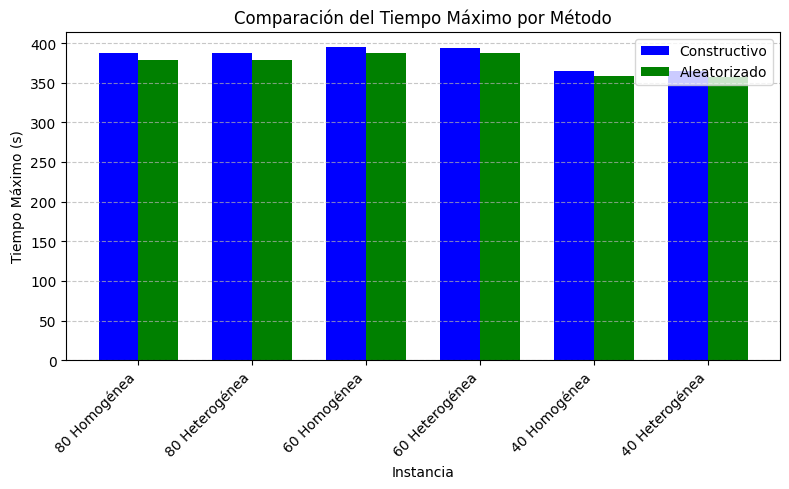

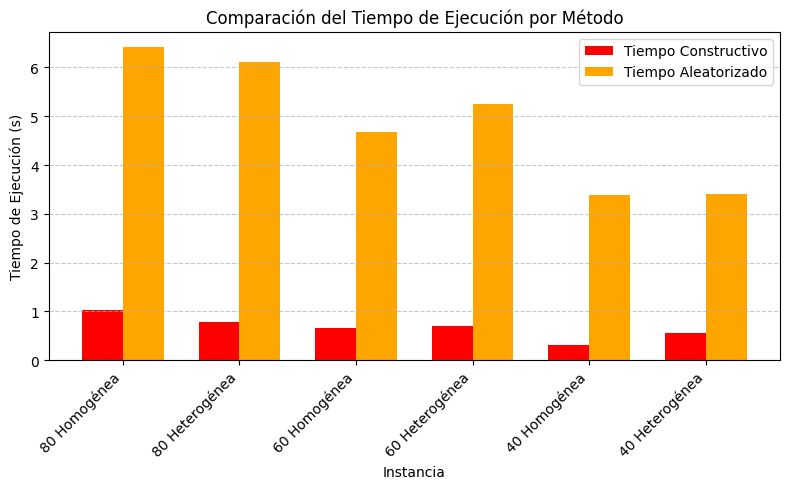

Las gr√°ficas han sido guardadas como 'comparacion_maxima.png' y 'comparacion_tiempo_ejecucion.png'.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de las instancias
instancias = ["80 Homog√©nea", "80 Heterog√©nea", "60 Homog√©nea", "60 Heterog√©nea", "40 Homog√©nea", "40 Heterog√©nea"]

# Tiempos m√°ximos en segundos
constructivo = [387.64, 387.86, 394.45, 394.01, 364.31, 364.68]
aleatorizado = [378.86, 378.56, 387.86, 388.06, 358.32, 357.67]

# Tiempos de ejecuci√≥n
tiempo_constructivo = [1.03, 0.78, 0.66, 0.71, 0.32, 0.56]
tiempo_aleatorizado = [6.41, 6.12, 4.68, 5.26, 3.39, 3.41]

# Crear gr√°fico de comparaci√≥n de tiempos m√°ximos
plt.figure(figsize=(8, 5))
x = np.arange(len(instancias))
width = 0.35

plt.bar(x - width/2, constructivo, width, label="Constructivo", color="blue")
plt.bar(x + width/2, aleatorizado, width, label="Aleatorizado", color="green")

plt.xlabel("Instancia")
plt.ylabel("Tiempo M√°ximo (s)")
plt.title("Comparaci√≥n del Tiempo M√°ximo por M√©todo")
plt.xticks(ticks=x, labels=instancias, rotation=45, ha="right")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Guardar gr√°fico
plt.tight_layout()
plt.savefig("comparacion_maxima.png", dpi=300)
plt.show()

# Crear gr√°fico de comparaci√≥n de tiempos de ejecuci√≥n
plt.figure(figsize=(8, 5))

plt.bar(x - width/2, tiempo_constructivo, width, label="Tiempo Constructivo", color="red")
plt.bar(x + width/2, tiempo_aleatorizado, width, label="Tiempo Aleatorizado", color="orange")

plt.xlabel("Instancia")
plt.ylabel("Tiempo de Ejecuci√≥n (s)")
plt.title("Comparaci√≥n del Tiempo de Ejecuci√≥n por M√©todo")
plt.xticks(ticks=x, labels=instancias, rotation=45, ha="right")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Guardar gr√°fico
plt.tight_layout()
plt.savefig("comparacion_tiempo_ejecucion.png", dpi=300)
plt.show()

print("Las gr√°ficas han sido guardadas como 'comparacion_maxima.png' y 'comparacion_tiempo_ejecucion.png'.")
